# Reservoir

In [1]:
# Imports
import json
import os
import pickle

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


import reservoirpy
from reservoirpy.observables import mse, rsquare, rmse
from reservoirpy.nodes import Reservoir, Ridge, ESN

from reservoirpy.hyper import research
from reservoirpy.hyper import plot_hyperopt_report

from utils import dataset
from utils import esn

reservoirpy.verbosity(0)
reservoirpy.set_seed(1421)

## HP Exploration

### 1. Importance of feedback

 15%|█▌        | 15/100 [11:42<1:05:25, 46.18s/trial, best loss: 0.043987451345520345]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=5.76112e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 17%|█▋        | 17/100 [13:14<1:03:21, 45.80s/trial, best loss: 0.034287071897520276]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.42514e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 25%|██▌       | 25/100 [19:27<59:00, 47.20s/trial, best loss: 0.034287071897520276]  

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=9.84473e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 57%|█████▋    | 57/100 [43:48<32:36, 45.51s/trial, best loss: 0.03375561220422887] 

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.324e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



100%|██████████| 100/100 [1:16:36<00:00, 45.96s/trial, best loss: 0.03375561220422887]


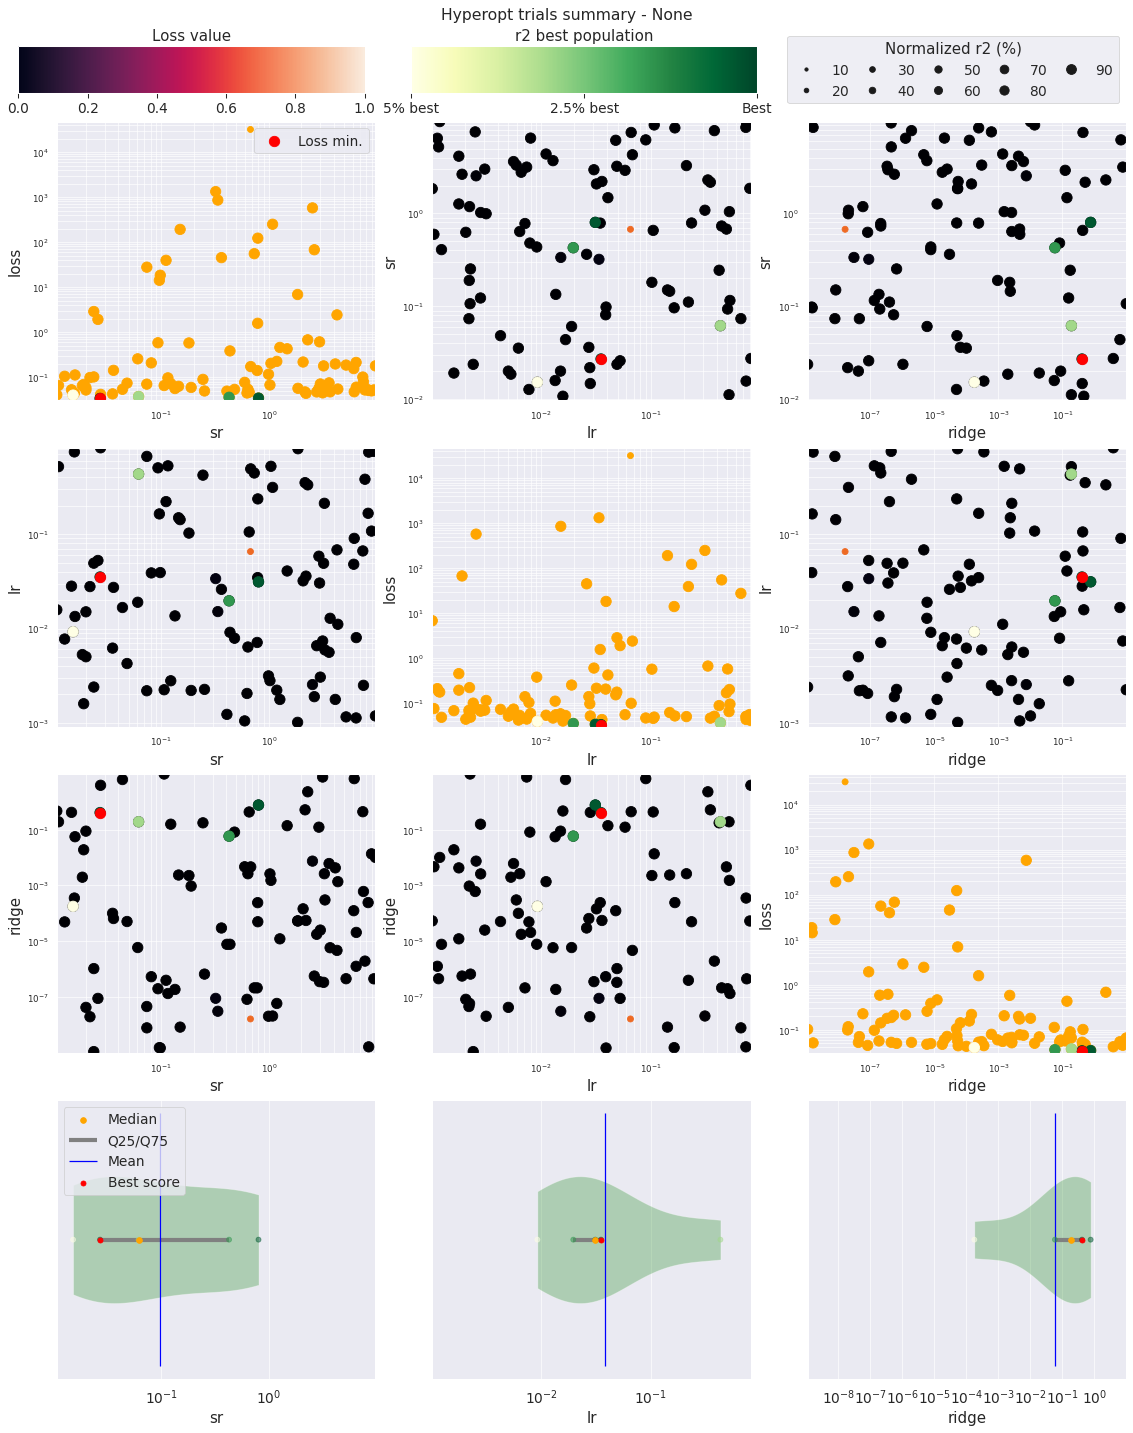

In [2]:
hyperopt_config = {
    "exp": "reservoir_feedback_1", 
    "hp_max_evals": 100, 
    "hp_method": "random", 
    "seed": 260_418, 
    "instances_per_trial": 1, 
    "hp_space": {
        "N": ["choice", 500],
        "sr": ["loguniform", 1e-2, 10],
        "lr": ["loguniform", 1e-3, 1],
        "input_scaling": ["loguniform", 1e-2, 1e2],
        "fb": ["loguniform", 1e-4, 1e1],
        "ridge": ["loguniform", 1e-9, 10],
        "seed": ["choice", 1234],
        "only_first": ["choice", True],
    }
}

os.makedirs(f"./hyperopt/{hyperopt_config['exp']}/", exist_ok=True)
with open(f"./hyperopt/{hyperopt_config['exp']}/config.json", "w+") as f:
    json.dump(hyperopt_config, f)

if (not os.path.exists(f"./hyperopt/{hyperopt_config['exp']}/report.png")):
    best = research(
        objective = esn.objective, 
        dataset = None,
        config_path = f"./hyperopt/{hyperopt_config['exp']}/config.json", 
        report_path = "./hyperopt/", 
    )

fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

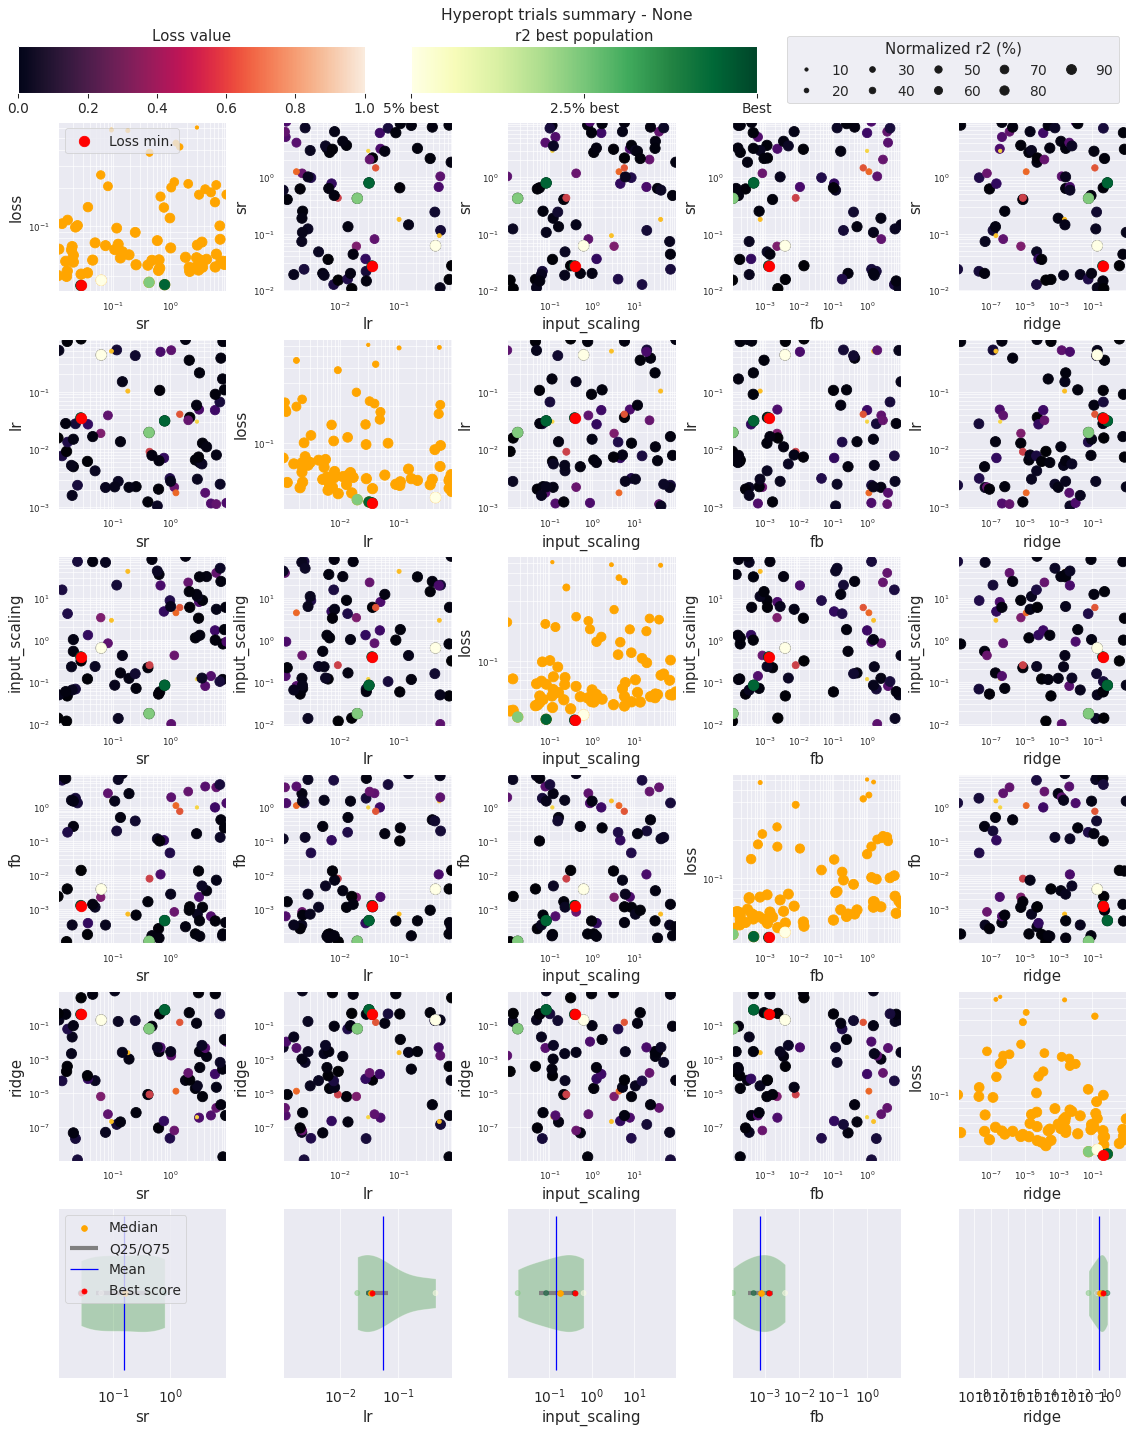

In [3]:
fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "input_scaling", "fb", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/trimmed_report.png")

### 2. Parameter exploration

  3%|▎         | 15/500 [08:34<4:36:17, 34.18s/trial, best loss: 0.030523852918879726]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.42044e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



  3%|▎         | 17/500 [09:44<4:38:22, 34.58s/trial, best loss: 0.030523852918879726]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.16754e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 11%|█▏        | 57/500 [32:49<4:16:21, 34.72s/trial, best loss: 0.02554966499854038] 

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.63019e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 21%|██▏       | 107/500 [1:01:29<3:46:09, 34.53s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.8608e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 22%|██▏       | 110/500 [1:03:13<3:44:00, 34.46s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=4.52533e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 34%|███▍      | 170/500 [1:37:35<3:07:29, 34.09s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.36856e-18): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 38%|███▊      | 191/500 [1:49:28<2:56:19, 34.24s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.04684e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 39%|███▉      | 197/500 [1:52:55<2:53:58, 34.45s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=9.66006e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 46%|████▌     | 230/500 [2:11:51<2:34:27, 34.32s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.65933e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 50%|█████     | 250/500 [2:23:21<2:23:11, 34.37s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.10482e-16): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 53%|█████▎    | 264/500 [2:31:24<2:16:38, 34.74s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.03173e-16): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 59%|█████▉    | 294/500 [2:48:38<1:57:35, 34.25s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.85916e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 67%|██████▋   | 334/500 [3:11:35<1:36:35, 34.91s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.024e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 67%|██████▋   | 337/500 [3:13:17<1:32:56, 34.21s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.78608e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 71%|███████   | 354/500 [3:23:00<1:23:19, 34.24s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.3472e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 71%|███████   | 355/500 [3:23:35<1:23:39, 34.62s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.67033e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 74%|███████▍  | 369/500 [3:31:42<1:15:55, 34.78s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=4.85471e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 78%|███████▊  | 388/500 [3:42:37<1:04:28, 34.54s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.61349e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 79%|███████▉  | 395/500 [3:46:36<59:50, 34.19s/trial, best loss: 0.025254272498604874]  

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=5.78203e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 79%|███████▉  | 397/500 [3:47:45<58:36, 34.14s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.57119e-18): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 80%|████████  | 401/500 [3:50:02<56:35, 34.30s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.40714e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 82%|████████▏ | 410/500 [3:55:09<51:19, 34.21s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=4.28072e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 82%|████████▏ | 411/500 [3:55:43<50:37, 34.13s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.39964e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 83%|████████▎ | 416/500 [3:58:34<48:12, 34.43s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.7559e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 87%|████████▋ | 435/500 [4:09:25<36:47, 33.96s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.31595e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 94%|█████████▎| 468/500 [4:28:24<18:12, 34.13s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.01953e-16): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 95%|█████████▍| 473/500 [4:31:15<15:20, 34.08s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.9596e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 96%|█████████▌| 479/500 [4:34:42<12:02, 34.41s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.95655e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 99%|█████████▉| 497/500 [4:44:59<01:42, 34.32s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.00979e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



100%|██████████| 500/500 [4:46:42<00:00, 34.40s/trial, best loss: 0.025254272498604874]


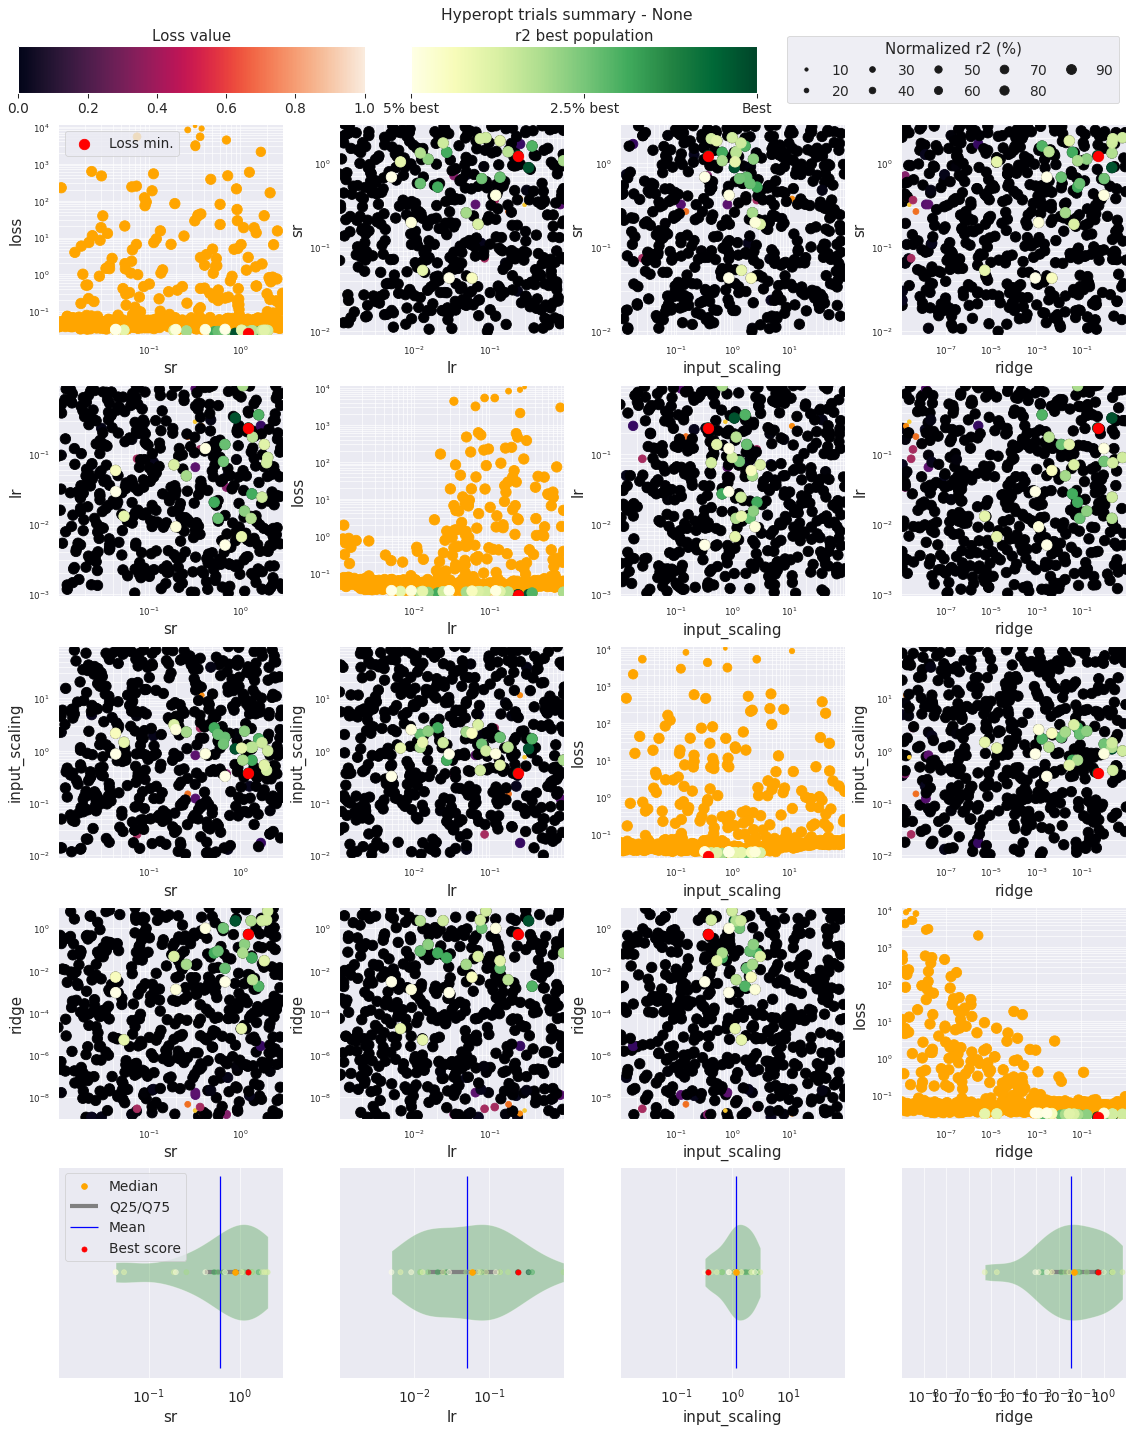

In [2]:
hyperopt_config = {
    "exp": "reservoir_exploration_1", 
    "hp_max_evals": 500, 
    "hp_method": "random", 
    "seed": 260_418, 
    "instances_per_trial": 1, 
    "hp_space": {
        "N": ["choice", 500],
        "sr": ["loguniform", 1e-2, 3],
        "lr": ["loguniform", 1e-3, 1],
        "input_scaling": ["loguniform", 1e-2, 1e2],
        "ridge": ["loguniform", 1e-9, 10],
        "seed": ["choice", 1234],
        "only_first": ["choice", True],
    }
}

os.makedirs(f"./hyperopt/{hyperopt_config['exp']}/", exist_ok=True)
with open(f"./hyperopt/{hyperopt_config['exp']}/config.json", "w+") as f:
    json.dump(hyperopt_config, f)

if (not os.path.exists(f"./hyperopt/{hyperopt_config['exp']}/report.png")):
    best = research(
        objective = esn.objective, 
        dataset = None,
        config_path = f"./hyperopt/{hyperopt_config['exp']}/config.json", 
        report_path = "./hyperopt/", 
    )

fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "input_scaling", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

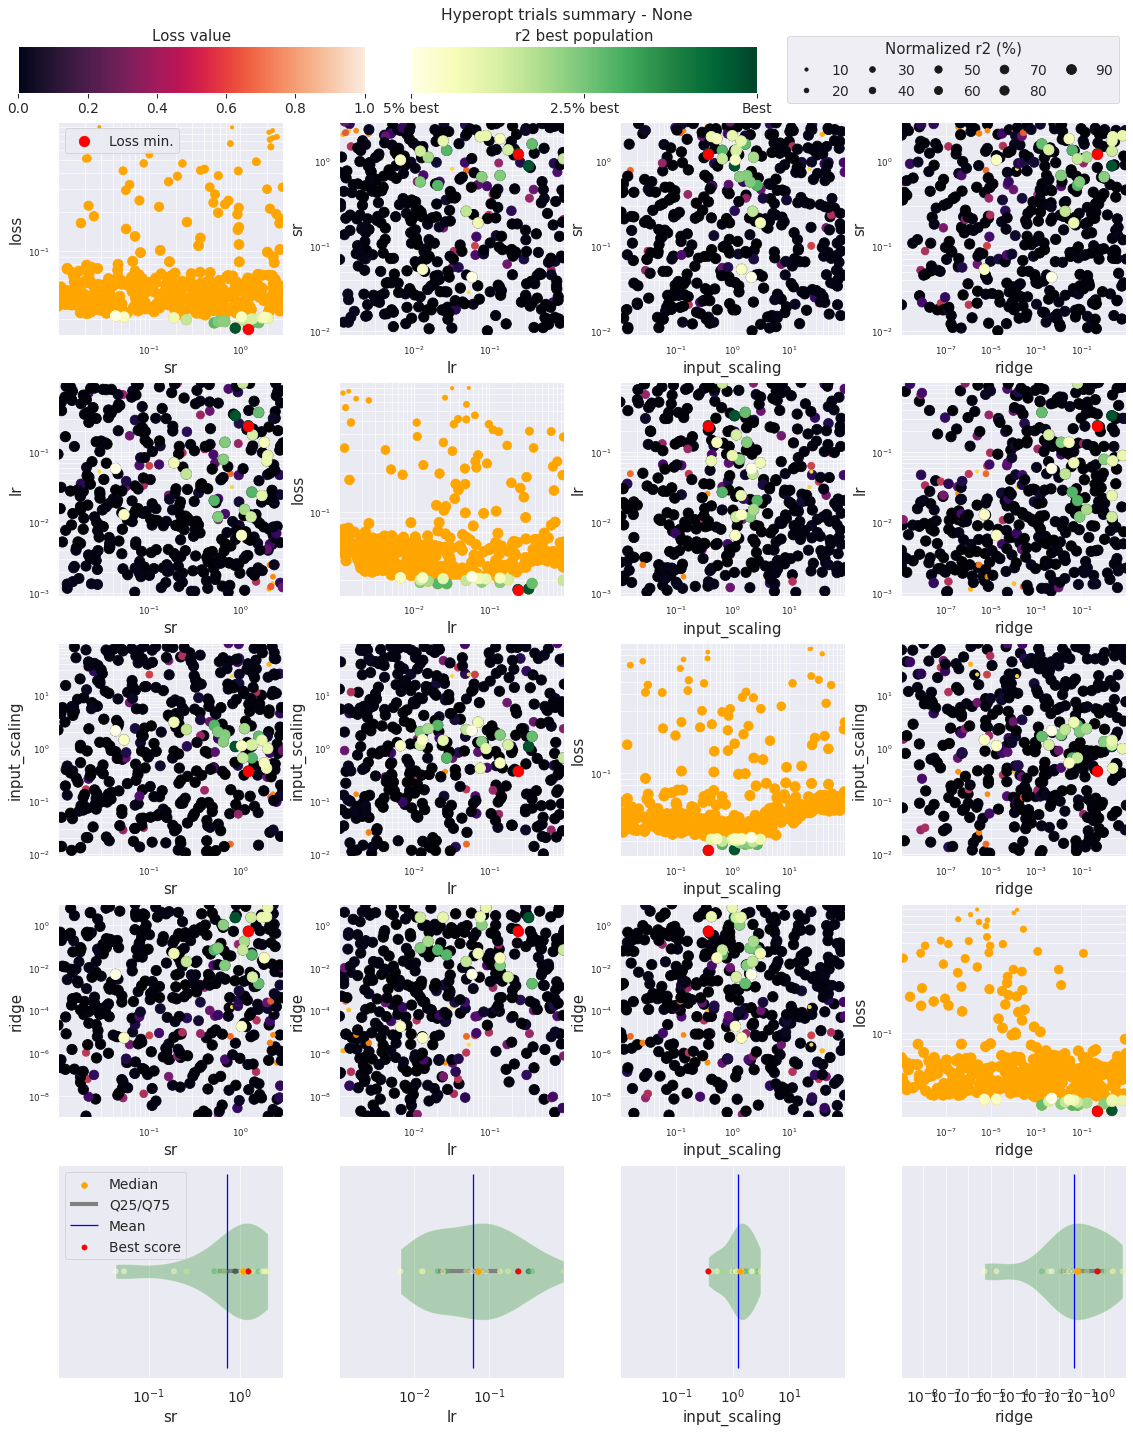

In [3]:
fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "input_scaling", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/trimmed_report.png")

### 3. Reservoir size exploration

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 500/500 [6:35:38<00:00, 47.48s/trial, best loss: 0.02035334996159977]  


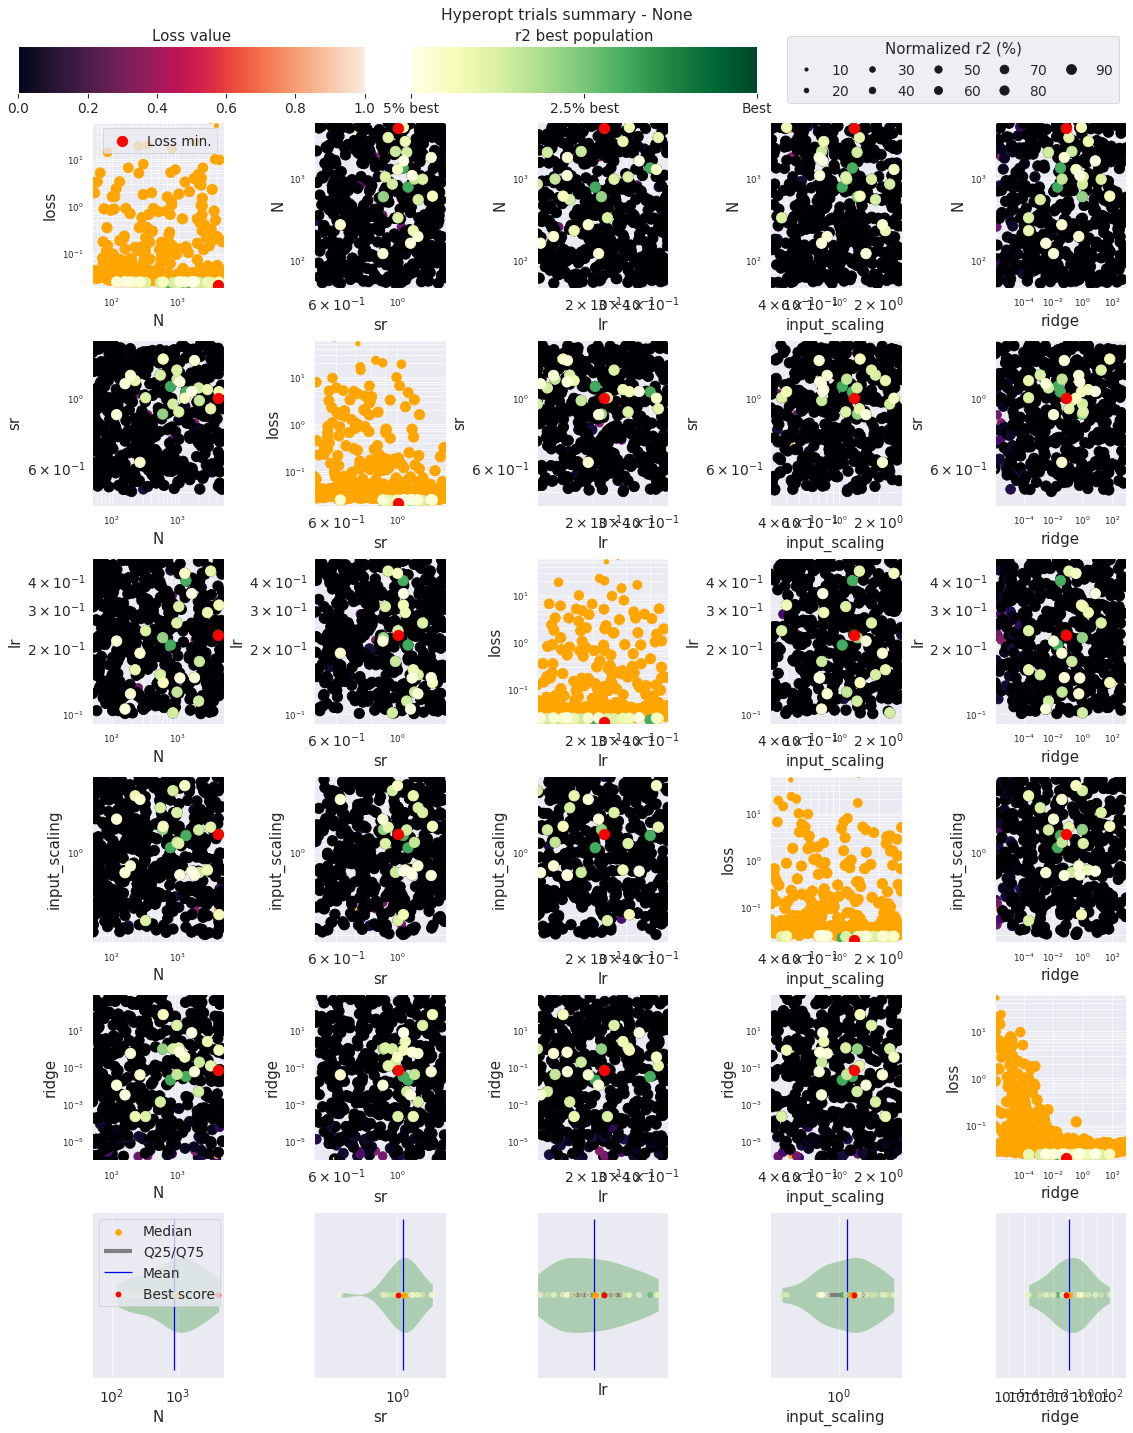

In [4]:
hyperopt_config = {
    "exp": "reservoir_size_1", 
    "hp_max_evals": 500, 
    "hp_method": "random", 
    "seed": 260_418, 
    "instances_per_trial": 1, 
    "hp_space": {
        "N": ["loguniform", 5e1, 5e3],
        "sr": ["loguniform", 5e-1, 1.5],
        "lr": ["loguniform", 1e-1, 5e-1],
        "input_scaling": ["loguniform", 0.3, 3],
        "ridge": ["loguniform", 1e-6, 1e3],
        "seed": ["choice", 1234],
        "only_first": ["choice", True],
    }
}

os.makedirs(f"./hyperopt/{hyperopt_config['exp']}/", exist_ok=True)
with open(f"./hyperopt/{hyperopt_config['exp']}/config.json", "w+") as f:
    json.dump(hyperopt_config, f)

if (not os.path.exists(f"./hyperopt/{hyperopt_config['exp']}/report.png")):
    best = research(
        objective = esn.objective, 
        dataset = None,
        config_path = f"./hyperopt/{hyperopt_config['exp']}/config.json", 
        report_path = "./hyperopt/", 
    )

fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("N", "sr", "lr", "input_scaling", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

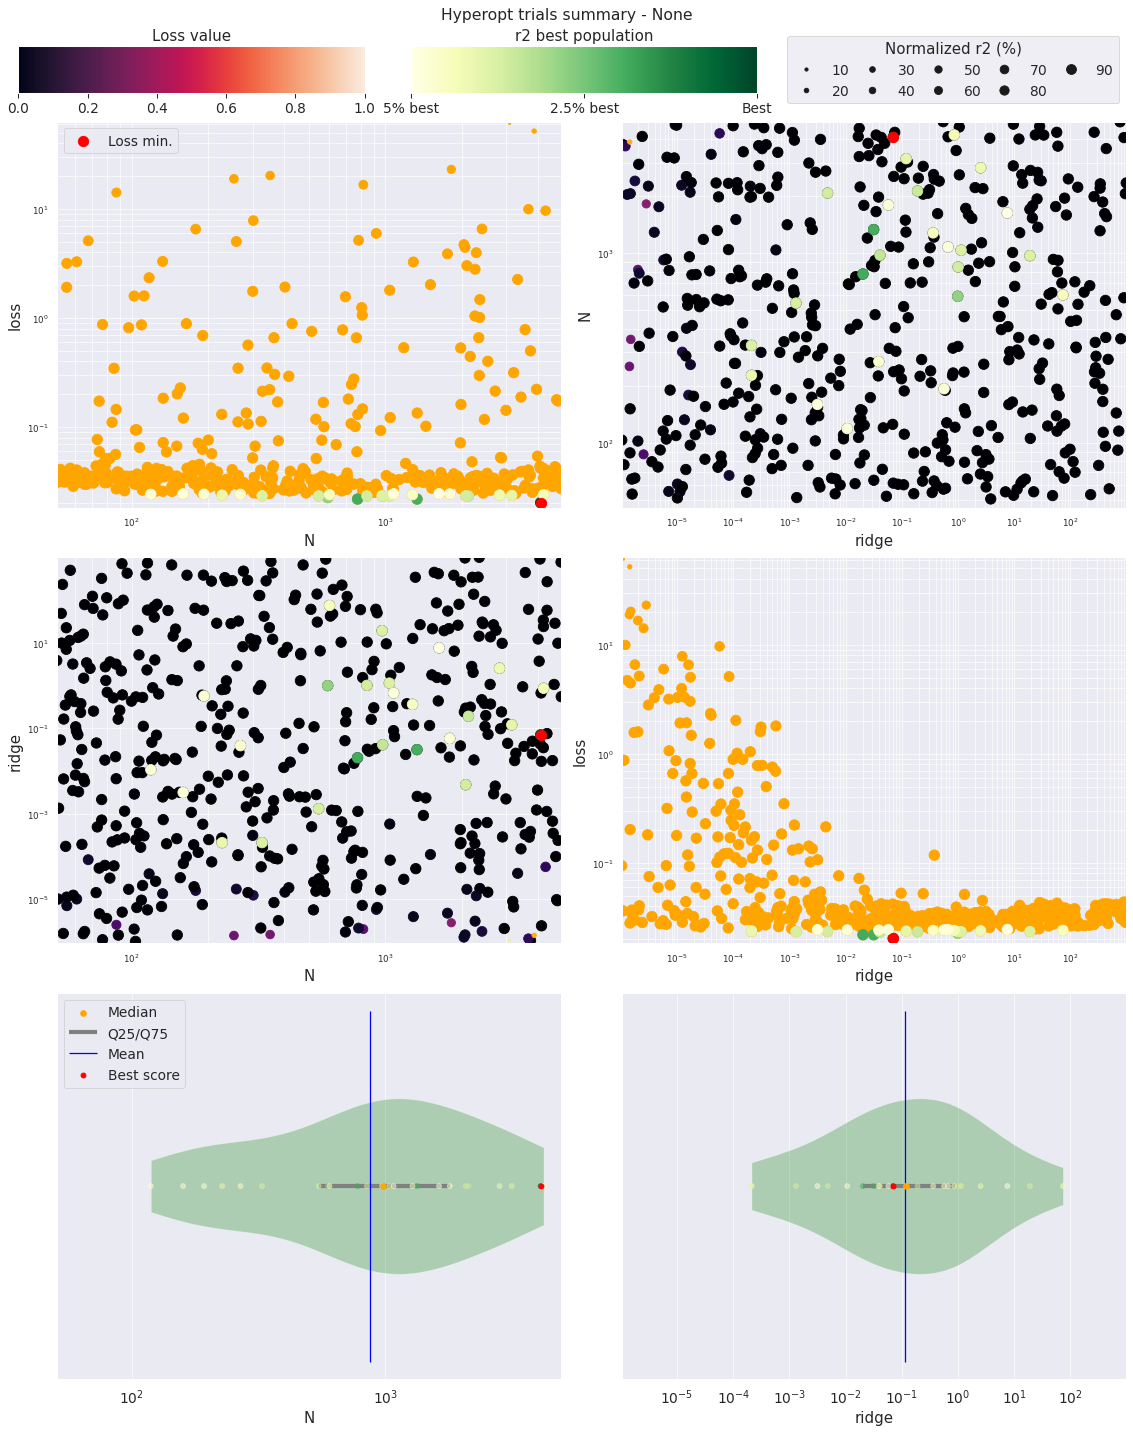

In [5]:
fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("N", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

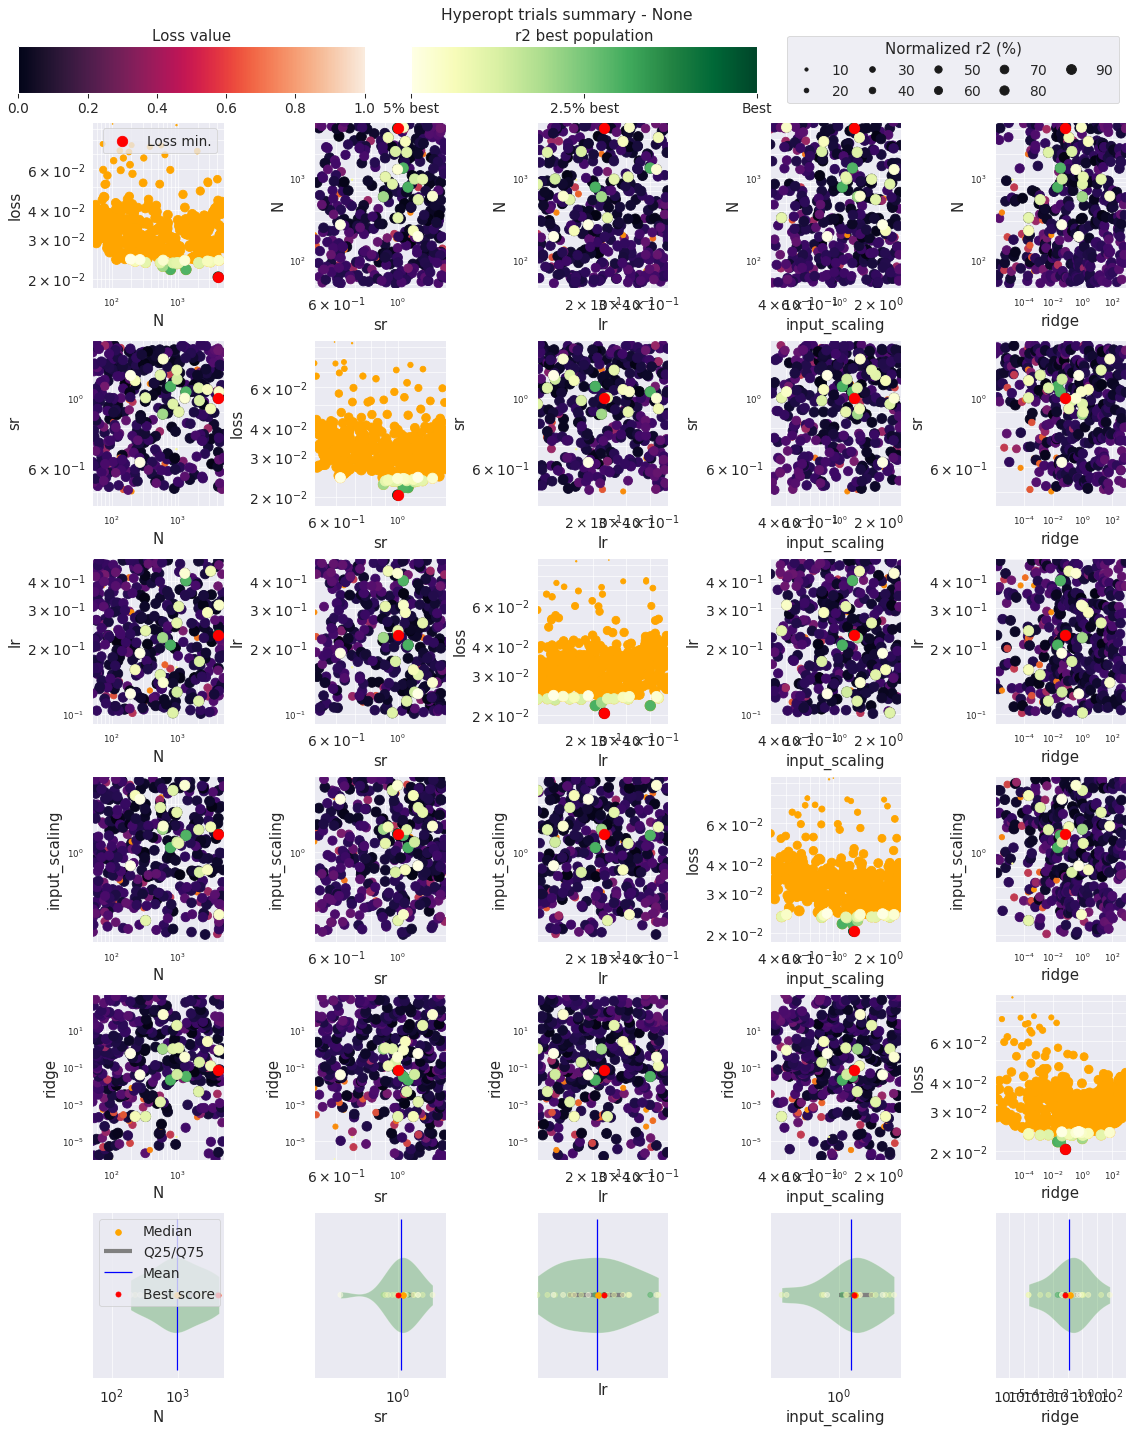

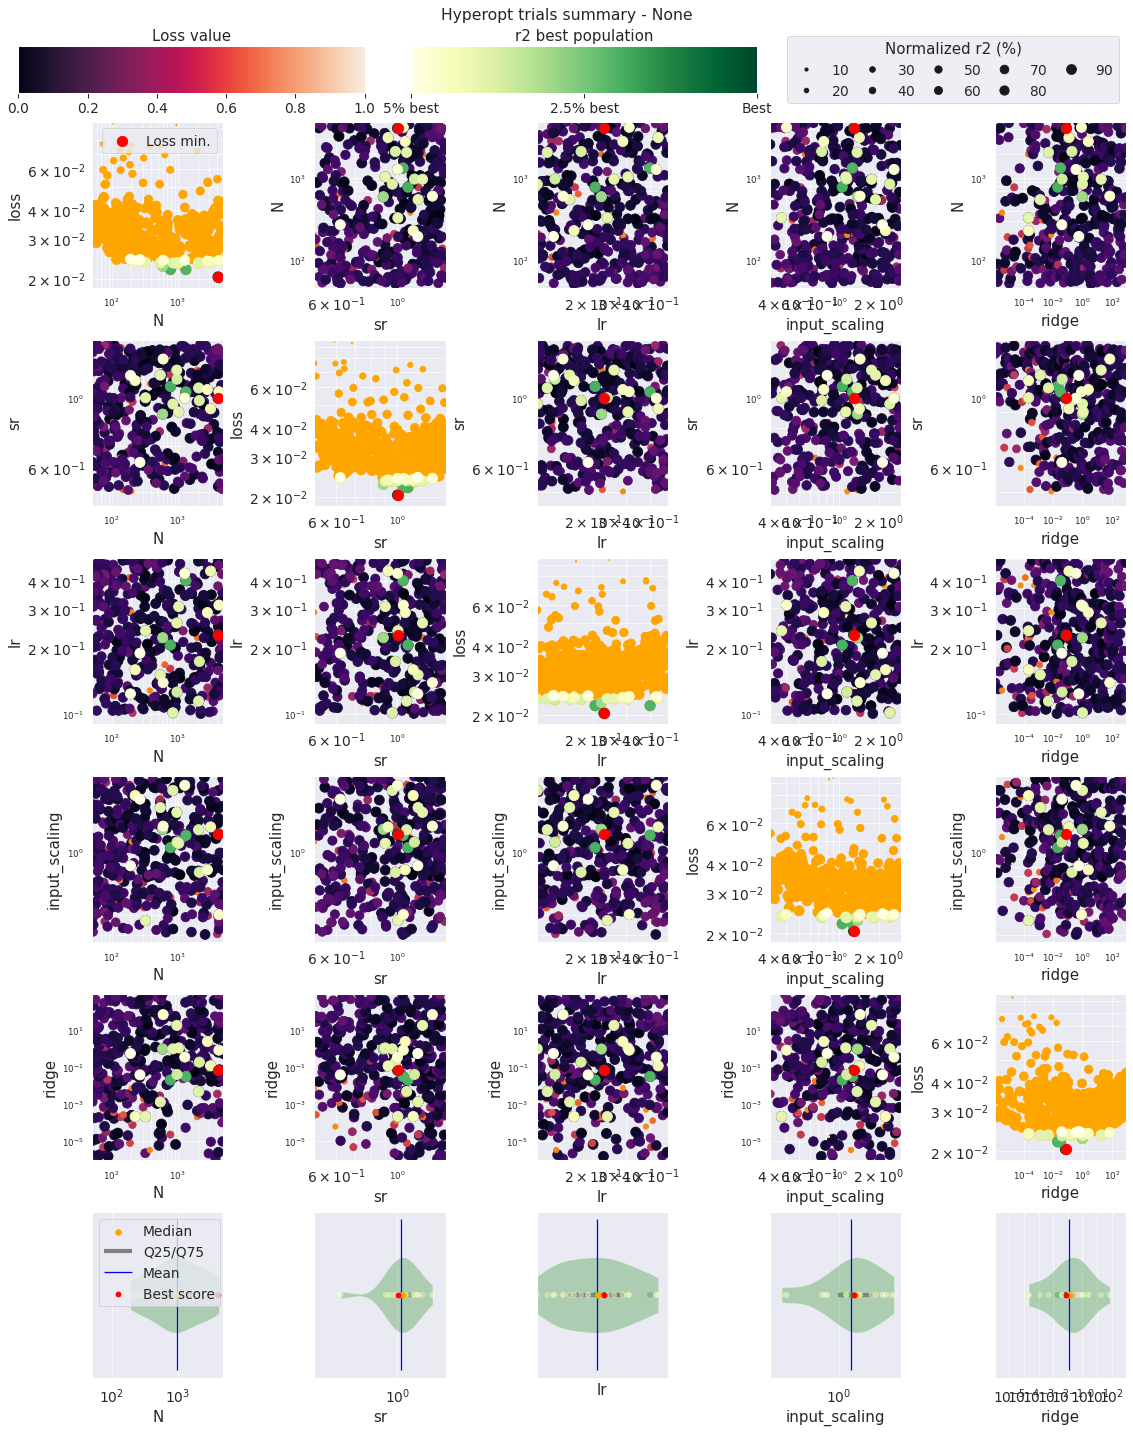

In [3]:
_ = plot_hyperopt_report(f"./hyperopt/reservoir_size_1/", ("N", "sr", "lr", "input_scaling", "ridge"), metric="r2")

## Plot time vs reservoir size

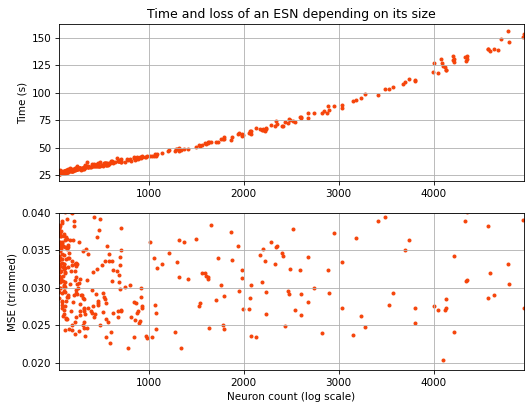

In [3]:
import reservoirpy.hyper as h

results = h._hyperplot._get_results(f"hyperopt/{'reservoir_size_1'}")

Ns = [result["current_params"]["N"] for result in results]
durations = [result["returned_dict"]["duration"] for result in results]
losses = [result["returned_dict"]["loss"] for result in results]

plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.grid()
plt.scatter(Ns, durations, s=8)
# plt.xscale("log")
plt.title("Time and loss of an ESN depending on its size")
plt.ylabel("Time (s)")

plt.subplot(2,1,2)
plt.ylim(0.019, 0.04)
plt.grid()
plt.scatter(Ns, losses, s=8)
# plt.xscale("log")
plt.xlabel("Neuron count (log scale)")
plt.ylabel("MSE (trimmed)")

plt.show()

[ 10  24  38  52  66 150 250 300  30  60  90 120 150 180 210 240 270] [6007.74126363 3291.59487724 2883.3204608  1914.3923533  1659.77502561
 3085.19758184 3046.17434549 4056.70379496 4025.47321177 2097.45690036
 2175.84474754 2057.33996987 2635.94456053 2007.53075337 2139.29406381
 2233.23379755 3680.56952906]


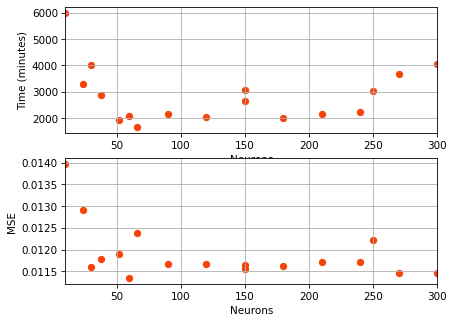

In [47]:
# LSTM results
import glob
import re

neurons = []
scores = []


for path in glob.glob("./models/out_seed=*_neurons=*.pickle"):
    seed, neurons_ = re.fullmatch(r"\./models/out_seed=(\d+)_neurons=(\d+).pickle", path).groups()
    neurons.append(int(neurons_))

    with open(path, "rb") as file:
        res = pickle.load(file)
        scores.append(res.history["val_loss"][-1])

ns1 = [10, 24, 38, 52, 66, 150, 250, 300, ]

times1 = np.array([
    6007.741263628006,
    3291.594877243042,
    2883.320460796356,
    1914.39235329628,
    1659.7750256061554,
    3085.1975818387481,
    3046.1743454933167,
    4056.7037949562073,
])

ns2 = list(range(30, 300, 30))
times2 = np.array([
    4025.4732117652893, 
    2097.4569003582, 
    2175.844747543335, 
    2057.3399698734283, 
    2635.9445605278015, 
    2007.5307533740997, 
    2139.294063806534, 
    2233.2337975502014, 
    3680.569529056549
])

ns = np.concatenate((ns1, ns2))
times = np.concatenate((times1, times2))

print(ns, times)

plt.figure()
plt.subplot(2,1,1)
plt.scatter(x=ns, y=times, )
plt.xlabel("Neurons")
plt.ylabel("Time (minutes)")
plt.grid()
plt.subplot(2,1,2)
plt.scatter(x=neurons, y=scores, )
plt.xlabel("Neurons")
plt.ylabel("MSE")
plt.grid()
plt.show()

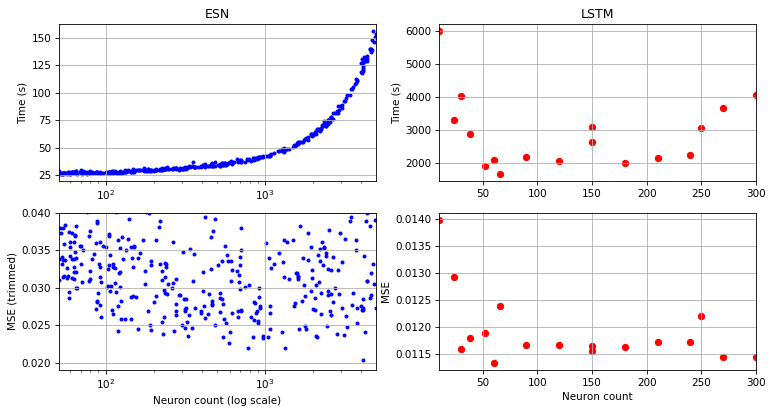

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.grid()
plt.scatter(Ns, durations, s=8, color="blue")
plt.xscale("log")
plt.title("ESN")
plt.ylabel("Time (s)")

plt.subplot(2, 2, 3)
plt.ylim(0.019, 0.04)
plt.grid()
plt.scatter(Ns, losses, s=8, color="blue")
plt.xscale("log")
plt.xlabel("Neuron count (log scale)")
plt.ylabel("MSE (trimmed)")


plt.subplot(2, 2, 2)
plt.title("LSTM")
plt.scatter(x=ns, y=times, color="red")
plt.ylabel("Time (s)")
plt.grid()
plt.subplot(2, 2, 4)
plt.scatter(x=neurons, y=scores, color="red")
plt.xlabel("Neuron count")
plt.ylabel("MSE")
plt.grid()

plt.savefig("size_time.svg")
plt.show()

## Reach metrics

In [2]:
from utils import metrics

In [3]:
model = esn.model(
    N=500,
    input_scaling=1.5,
    lr=0.2,
    ridge=0.1,
    seed=0,
    sr=1.,
)

fold = dataset.kfold_infos().__next__()
X_train, Y_train, Info_train, X_test, Y_test, Info_test = fold

trained_model = esn.train_model_fold(model, (X_train, Y_train, X_test, Y_test))
Y_pred = esn.run_model_fold(model, (X_train, Y_train, X_test, Y_test))

In [30]:
lsd = metrics.last_step_distances(X_test, Y_pred, Info_test)
lsd2 = metrics.last_step_distances(X_test, Y_test, Info_test)
lsd2 = [s[s < 0.2] for s in lsd2]
print(lsd[0].shape)
print(lsd2[0].shape)

(243,)
(243,)


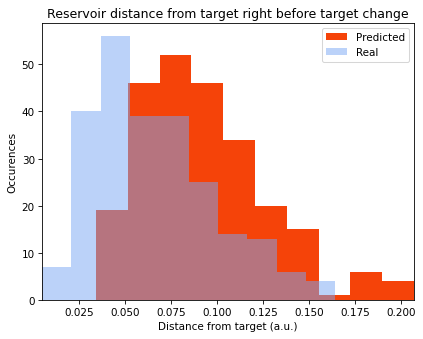

In [5]:
plt.figure()
plt.hist(lsd[0], label="Predicted")
plt.hist(lsd2[0], label="Real", alpha=0.5)
plt.xlabel("Distance from target (a.u.)")
plt.ylabel("Occurences")
plt.title("Reservoir distance from target right before target change")
plt.legend()
plt.show()

In [27]:
rd = metrics.red_distances(X_test, Y_pred, Info_test)
rd2 = metrics.red_distances(X_test, Y_test, Info_test)
rd2 = [s[s < 0.2] for s in rd2]
print(rd[0].shape)
print(rd2[0].shape)

(8513,)
(8513,)


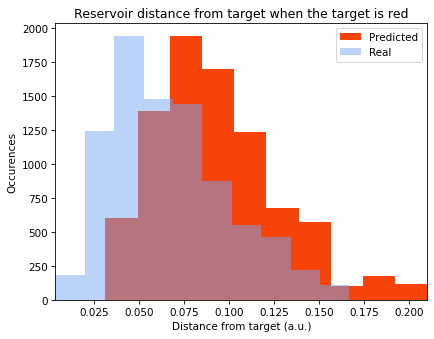

In [28]:
plt.figure()
plt.hist(rd[0], label="Predicted")
plt.hist(rd2[0], label="Real", alpha=0.5)
plt.xlabel("Distance from target (a.u.)")
plt.ylabel("Occurences")
plt.title("Reservoir distance from target when the target is red")
plt.legend()
plt.show()

In [8]:
with open("./lsd_lstm.pickle", "rb") as file:
    lsd_lstm = pickle.load(file)

with open("./rd_lstm.pickle", "rb") as file:
    rd_lstm = pickle.load(file)

rd_esn = rd
lsd_esn = lsd

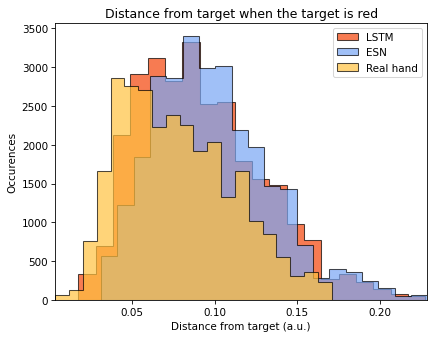

In [36]:
plt.figure()
plt.hist(np.concatenate(rd_lstm), label="LSTM", alpha=0.7, edgecolor="black", histtype='stepfilled', bins=20)
plt.hist(np.concatenate(rd_esn), label="ESN", alpha=0.7, edgecolor="black", histtype='stepfilled', bins=20)
plt.hist(np.concatenate(rd2), label="Real hand", alpha=0.7, edgecolor="black", histtype='stepfilled', bins=20)
plt.xlabel("Distance from target (a.u.)")
plt.ylabel("Occurences")
plt.title("Distance from target when the target is red")
plt.legend()
plt.savefig("dist_red.svg")
plt.show()

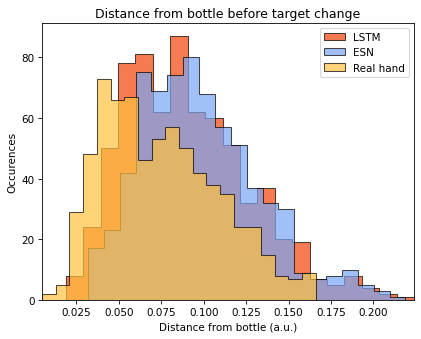

In [38]:
plt.figure()
plt.hist(np.concatenate(lsd_lstm), label="LSTM", alpha=0.7, edgecolor="black", histtype='stepfilled', bins=20)
plt.hist(np.concatenate(lsd_esn), label="ESN", alpha=0.7, edgecolor="black", histtype='stepfilled', bins=20)
plt.hist(np.concatenate(lsd2), label="Real hand", alpha=0.7, edgecolor="black", histtype='stepfilled', bins=20)
plt.xlabel("Distance from bottle (a.u.)")
plt.ylabel("Occurences")
plt.title("Distance from bottle before target change")
plt.legend()
plt.savefig("dist_last.svg")
plt.show()

### Distances hand - model - target

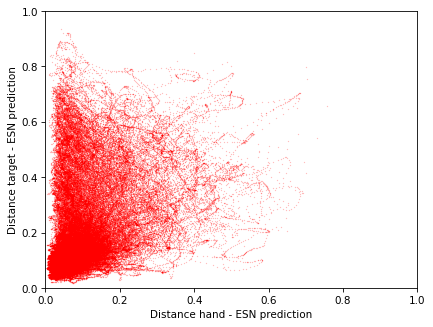

In [5]:
esn_hand_distances = metrics.all_distances(x=X_test, test=Y_test, pred=Y_pred)

plt.figure()

for hand_model, target_model in esn_hand_distances:
    plt.scatter(hand_model, target_model, color="red", s=0.01)

plt.xlabel("Distance hand - ESN prediction")
plt.ylabel("Distance target - ESN prediction")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [12]:
# with open("./esn_distances.pickle", "wb+") as file:
#     pickle.dump(esn_hand_distances, file)

#### Plot both at the same time

In [6]:
with open("./lstm_distances.pickle", "rb") as file:
    lstm_hand_distances = pickle.load(file)

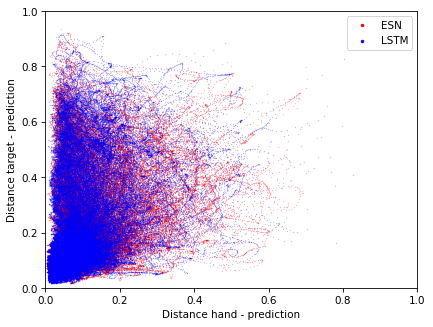

In [11]:
plt.figure()

for hand_model, target_model in esn_hand_distances:
    plt.scatter(hand_model, target_model, color="red", s=0.01)
plt.scatter([], [], color="red", s=5, label="ESN")

for hand_model, target_model in lstm_hand_distances:
    plt.scatter(hand_model, target_model, color="blue", s=0.01)
plt.scatter([], [], color="blue", s=5, label="LSTM")

plt.xlabel("Distance hand - prediction")
plt.ylabel("Distance target - prediction")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# On one subject

In [2]:
import pickle

with open('./data/preprocessed_subjectwise_.pickle', 'rb') as file:
    data = pickle.load(file)

data[3]

timestamp  subjectId  tgtNumber  tgtRed  shoulderPitch  \
216602     5.008832          3       1221   False      -0.401373   
216603     5.020687          3       1221   False      -0.401352   
216604     5.030931          3       1221   False      -0.400776   
216605     5.042009          3       1221   False      -0.398201   
216606     5.053152          3       1221   False      -0.395955   
...             ...        ...        ...     ...            ...   
269874  1087.253540          3       1527    True       0.033187   
269875  1087.263916          3       1527    True       0.033125   
269876  1087.275146          3       1527    True       0.033898   
269877  1087.286133          3       1527    True       0.034240   
269878  1087.297119          3       1527    True       0.034747   

        shoulderRoll    armYaw  elbowPitch  forearmYaw  wristPitch  ...  \
216602     -0.142739  0.542553   -0.193133    0.043929    0.468801  ...   
216603     -0.140515  0.541862   -0.191297    0.041902    0.466689  ...   
216604     -0.138037  0.540082   -0.188377    0.042474    0.468745  ...   
216605     -0.134895  0.536784   -0.185126    0.043746    0.471250  ...   
216606     -0.131877  0.533484   -0.180353    0.045245    0.471755  ...   
...              ...       ...         ...         ...         ...  ...   
269874      0.471105 -0.128249   -0.182511    0.053455   -0.671562  ...   
269875      0.471487 -0.128390   -0.181783    0.052201   -0.671228  ...   
269876      0.472169 -0.130331   -0.182043    0.051231   -0.668532  ...   
269877      0.470272 -0.130749   -0.184480    0.051133   -0.666941  ...   
269878      0.471196 -0.129991   -0.185708    0.047637   -0.668053  ...   

         endEffX   endEffY   endEffZ  endEffPitch  endEffRoll      tgtX  \
216602  0.062792  0.198800  0.410927    -0.073521   -0.445305  0.038963   
216603  0.063825  0.199719  0.411997    -0.074143   -0.444520  0.038963   
216604  0.064649  0.200836  0.413638    -0.071910   -0.444767  0.038963   
216605  0.066175  0.200371  0.417002    -0.071277   -0.446014  0.038963   
216606  0.066659  0.200560  0.420584    -0.072213   -0.447325  0.038963   
...          ...       ...       ...          ...         ...       ...   
269874  0.491763  0.056886  0.546858    -0.546745    0.024655  0.517920   
269875  0.491731  0.056960  0.547338    -0.545585    0.022059  0.517920   
269876  0.491169  0.057064  0.547200    -0.543696    0.019387  0.517920   
269877  0.490161  0.057166  0.545621    -0.543311    0.019256  0.517920   
269878  0.491920  0.056133  0.544907    -0.542926    0.022559  0.517920   

            tgtY      tgtZ  tgtPitch   tgtRoll  
216602  0.144631  0.213118 -0.648170  0.075960  
216603  0.144631  0.213118 -0.648170  0.075960  
216604  0.144631  0.213118 -0.648170  0.075960  
216605  0.144631  0.213118 -0.648170  0.075960  
216606  0.144631  0.213118 -0.648170  0.075960  
...          ...       ...       ...       ...  
269874 -0.029771  0.432925 -0.537599  0.053539  
269875 -0.029771  0.432925 -0.537599  0.053539  
269876 -0.029771  0.432925 -0.537599  0.053539  
269877 -0.029771  0.432925 -0.537599  0.053539  
269878 -0.029771  0.432925 -0.537599  0.053539  

[53277 rows x 21 columns]

In [3]:
# Set definition
SHOULDER = [
    "shoulderPitch",
    "shoulderRoll",
]
HAND = [
    "endEffX",
    "endEffY",
    "endEffZ",
    "endEffPitch",
    "endEffRoll",
]
TARGET = [
    "tgtX",
    "tgtY",
    "tgtZ",
    "tgtPitch",
    "tgtRoll",
]
ARM = [
    "armYaw",
    "elbowPitch",
    "forearmYaw",
    "wristPitch",
    "wristRoll",
]
ADDITIONAL_INFO = [
    "timestamp",
    "subjectId",
    "tgtNumber",
    "tgtRed",
]

X_COLUMNS = SHOULDER + TARGET
Y_COLUMNS = HAND

subject_ids = list(data.keys())

X = [data[subject][X_COLUMNS].to_numpy() for subject in subject_ids]
Y = [data[subject][Y_COLUMNS].to_numpy() for subject in subject_ids]
INFO = [data[subject][ADDITIONAL_INFO].to_numpy() for subject in subject_ids]

In [2]:
model = esn.model(
    N=500,
    input_scaling=1.5,
    lr=0.2,
    ridge=0.1,
    seed=0,
    sr=1.,
)

subject_index = 0

split = dataset.X[subject_index].shape[0] * 8 // 10
X_train = dataset.X[subject_index][:split]
Y_train = dataset.Y[subject_index][:split]
X_test = dataset.X[subject_index][split:]
Y_test = dataset.Y[subject_index][split:]

In [3]:
model.fit(X_train, Y_train)
Y_pred = model.run(X_test)

mse(Y_pred, Y_test)

0.016103548646657202

In [6]:
scores= []

for x, y in zip(X, Y):
    split = x.shape[0] * 8 // 10
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    model = esn.model(
        N=500,
        input_scaling=1.5,
        lr=0.2,
        ridge=0.1,
        seed=0,
        sr=1.,
    )

    model.fit(X_train, Y_train)
    Y_pred = model.run(X_test)

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.024180040237410584
0.018145516907717155
0.02695471513974533
0.017056443245559532
0.021006686071637904
0.016943765624489023
0.028127272669515997
0.024215023650242647
0.02810140614417788
0.026394166840779113
0.020038442020731587
0.020482711792756184
0.026336536118032477
0.028647262807027556
0.02255756896697486


In [7]:
scores

[0.024180040237410584,
 0.018145516907717155,
 0.02695471513974533,
 0.017056443245559532,
 0.021006686071637904,
 0.016943765624489023,
 0.028127272669515997,
 0.024215023650242647,
 0.02810140614417788,
 0.026394166840779113,
 0.020038442020731587,
 0.020482711792756184,
 0.026336536118032477,
 0.028647262807027556,
 0.02255756896697486]

In [5]:
scores= []

for x, y in zip(dataset.X, dataset.Y):
    split = dataset.X[subject_index].shape[0] * 8 // 10
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    model = esn.model(
        N=3000,
        input_scaling=1.5,
        lr=0.2,
        ridge=0.1,
        seed=1,
        sr=1.,
    )

    model.fit(X_train, Y_train)
    Y_pred = model.run(X_test)

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.015686017755806053
0.0167781908862356
0.018226079123627628
0.015128934154229234
0.012346754723190165
0.01481179466160797
0.015909012801262095
0.01515077246657515
0.015917489333388626
0.019100681127007326
0.011989242123354605
0.01384838702338847
0.01990440027655764
0.012637452923331056
0.012785351129945062


In [6]:
# With old params
scores= []

for x, y in zip(dataset.X, dataset.Y):
    split = dataset.X[subject_index].shape[0] * 8 // 10
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    model = esn.model(
        N=500,
        input_scaling=0.1,
        lr=0.17,
        ridge=1e-5,
        seed=2,
        sr=0.9,
    )

    model.fit(X_train, Y_train)
    Y_pred = model.run(X_test)

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.014549553705470578
0.01590216879235205
0.02395632024955015
0.01190742656464197
0.013367476490295434
0.011817223961434661
0.015237725357574438
0.014111591937903938
0.01737826402916658
0.020266940189990413
0.011211410173887068
0.012831217649886685
0.018208182368295613
0.012710475175336123
0.014111153863401716


In [9]:
dataset.X[0].shape[0] * 8 // 10

42621

In [7]:
# With old params
scores= []

for x, y in zip(dataset.X, dataset.Y):
    split = dataset.X[subject_index].shape[0] * 8 // 10
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    model = esn.model(
        N=500,
        input_scaling=0.092,
        lr=0.16,
        ridge=5e-5,
        seed=2,
        sr=0.9,
    )

    model.fit(X_train, Y_train)
    Y_pred = model.run(X_test)

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.014381022120003136
0.016285747984970567
0.022670243923007618
0.011824076536338449
0.013742352958983607
0.011565490483229768
0.015335985536804209
0.014637238848015044
0.017709899276426886
0.01995165231253797
0.010999396063894964
0.013038627642167538
0.01807871412530647
0.012812480956445153
0.014734673841042812


In [10]:
# With old params
scores= []

for x, y in zip(dataset.X, dataset.Y):
    split = 40_000
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    model = esn.model(
        N=500,
        input_scaling=0.092,
        lr=0.16,
        ridge=5e-5,
        seed=2,
        sr=0.9,
    )

    model.fit(X_train, Y_train)
    Y_pred = model.run(X_test)

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.014449045446810258
0.017643095095973692
0.01942872859949909
0.012254733091395709
0.01257937012933327
0.010841512500812982
0.014157792882567211
0.015346284411394283
0.01680719533348513
0.017295799619895785
0.010302567425915331
0.013718537697968776
0.018460194363546997
0.012713122285463053
0.015141719501032231


In [11]:
def pred_from_params(dataset, N, sr, lr, input_scaling, ridge, seed, input_connectivity, rc_connectivity):
    X_train, Y_train, X_test, Y_test = dataset
    # Model creation
    reservoir = Reservoir(N, 
        rc_connectivity=rc_connectivity,
        input_connectivity=input_connectivity,
        sr=sr,
        lr=lr, 
        input_scaling=input_scaling,
        seed=seed,
    )
    readout = Ridge(ridge=ridge)

    model = reservoir >> readout

    # Train
    model.fit(X_train, Y_train, warmup=100)
    # Run
    Y_pred = model.run(X_test)
    return Y_pred

In [13]:
# With old params
scores= []

x, y = dataset.X[0], dataset.Y[0]

for seed in range(10):
    split = 40_000
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    Y_pred = pred_from_params(
        dataset=(X_train, Y_train, X_test, Y_test),
        N=500,
        input_scaling=0.092,
        lr=0.16,
        ridge=5e-5,
        seed=seed+10,
        sr=0.9,
        input_connectivity = 3 / 500,
        rc_connectivity = 3 / 500,
    )

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.014628968885710502
0.014888018906722356
0.015427001439078528
0.019083561088888708
0.014710305223529759
0.014050803900328378
0.016565287129493907
0.014387328670011246
0.013744902637118566
0.015198166694552285


In [16]:
# With old params
scores= []

x, y = dataset.X[0], dataset.Y[0]

for seed in range(10):
    split = 40_000
    X_train = x[:split]
    Y_train = y[:split]
    X_test = x[split:]
    Y_test = y[split:]

    Y_pred = pred_from_params(
        dataset=(X_train, Y_train, X_test, Y_test), 
        N=500,
        input_scaling=0.09212424327837941, 
        lr=0.16549074195065266, 
        ridge=5.516101793564999e-05, 
        seed=1994+seed, 
        sr=0.9082987601083072, 
        input_connectivity=0.1,
        rc_connectivity=0.1,
    )

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.013170808836150185
0.015815428701361076
0.013483757648128585
0.015378043104687628
0.014094455494956514
0.014749134517983967
0.014268732238262482
0.014326574192543547
0.013805836668070375
0.01631476924002437


In [17]:
# With old params
scores= []

X_train = dataset.X[0]
Y_train = dataset.Y[0]
X_test = dataset.X[1]
Y_test = dataset.Y[1]

for seed in range(10):

    Y_pred = pred_from_params(
        dataset=(X_train, Y_train, X_test, Y_test), 
        N=500,
        input_scaling=0.09212424327837941, 
        lr=0.16549074195065266, 
        ridge=5.516101793564999e-05, 
        seed=1994+seed, 
        sr=0.9082987601083072, 
        input_connectivity=0.1,
        rc_connectivity=0.1,
    )

    score = mse(Y_pred, Y_test)
    print(score)
    scores.append(score)

0.030437840643196597
0.02847546170601461
0.02793281215976864
0.028322441844771163
0.029122560002625367
0.029139265619423104
0.030700730801038793
0.028837341743132558
0.03014355767210162
0.02943659879048001


In [20]:
X_train[0]

array([-0.670288  , -0.25926754, -0.00343725,  0.19753598,  0.41171486,
       -0.47375132,  0.18114105])